In [749]:
#import all librairies needed
import json
import requests
import numpy as np
import seaborn as sns
from matplotlib.pyplot import *
from numpy.polynomial.polynomial import polyfit
#import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import pandas as pd
import requests as r
import re
import plotly.express as px

In [347]:
url = 'https://eddb.io/body'

In [497]:
headers = """accept: */*
accept-encoding: gzip, deflate, br
accept-language: fr-FR,fr;q=0.9,en-US;q=0.8,en;q=0.7
content-length: 564
content-type: application/x-www-form-urlencoded; charset=UTF-8
cookie: gadsTest=test; PHPSESSID=9uf83lvrv3u8nihmr8gdvg5sbm; _csrf=fde424d1c1457ce36db30960e6971c208ec9916f43ab9513ef0f76ed54826492a%3A2%3A%7Bi%3A0%3Bs%3A5%3A%22_csrf%22%3Bi%3A1%3Bs%3A32%3A%22_ZStUdt1zmV_8bpzQoLkEPfLg8ywSbWY%22%3B%7D; _ga=GA1.2.1185635936.1617716867; cookieconsent_dismissed=yes; _gid=GA1.2.1631857455.1620372174; eddb-theme=4fe2cc2168c1b37161e92181039a71b2ba7cee58594b5644f53fe0aea8eb03b2a%3A2%3A%7Bi%3A0%3Bs%3A10%3A%22eddb-theme%22%3Bi%3A1%3Bs%3A4%3A%22dark%22%3B%7D; gadsTest=test; __gads=ID=44c6d96603d8d341-22e2398ac5c700a0:T=1620375213:RT=1620375213:S=ALNI_MadJGDCI5cCLfl3DcVOXhIHIuMd5Q; _gat_gtag_UA_58296939_1=1
origin: https://eddb.io
referer: https://eddb.io/body
sec-ch-ua: "Google Chrome";v="89", "Chromium";v="89", ";Not A Brand";v="99"
sec-ch-ua-mobile: ?0
sec-fetch-dest: empty
sec-fetch-mode: cors
sec-fetch-site: same-origin
user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.128 Safari/537.36
x-csrf-token: Jf9Tjd7cqa-c6Q8m3QRmDEasjrXAMOaF1Bib1BG9y1Z6pQD5i7jdnuaEWXnlZhZ2F8PC3oVggMmzIOKjQt-cDw==
x-requested-with: XMLHttpRequest"""
headers = dict(i.split(': ') for i in headers.split('\n'))
#headers

In [776]:



#data = '_csrf=DYt1nQOAJv6pgub3598GeYc9CYi6Ie4JgtZPc_AGWbhS0SbpVuRSz9PvsKjfvXYD1lJF4_9xiEXl7jYEo2QO4Q%3D%3D&body%5BmaterialIds%5D=&body%5BsystemReserveTypeId%5D=&body%5Bring_type_id%5D=&body%5Bsystem_id%5D=&body%5BsystemIsPopulated%5D=&body%5BpowerId%5D=&body%5BgroupIds%5D=&body%5BhasRings%5D=&body%5BplanetTypeIds%5D=&body%5BcompactStarTypeIds%5D=&body%5Bdistance_to_spawn%5D=&body%5Bis_main_star%5D=&body%5BspectralClassIds%5D=&body%5BluminosityClassIds%5D=&body%5BcanLand%5D=&body%5BextraAttribute%5D=&body%5BreferenceSystemId%5D=17072&body%5BmaxReferenceDistance%5D=10&body%5Bpage%5D=1&body%5Bsort%5D=referenceDistance'
#data = dict(i.split(': ') for i in data.split('\n'))
df_link = pd.DataFrame()
for i in range(1,10):
    url = 'https://eddb.io/body' 
    data = '_csrf=DYt1nQOAJv6pgub3598GeYc9CYi6Ie4JgtZPc_AGWbhS0SbpVuRSz9PvsKjfvXYD1lJF4_9xiEXl7jYEo2QO4Q%3D%3D&body%5BmaterialIds%5D=&body%5BsystemReserveTypeId%5D=&body%5Bring_type_id%5D=&body%5Bsystem_id%5D=&body%5BsystemIsPopulated%5D=&body%5BpowerId%5D=&body%5BgroupIds%5D=&body%5BhasRings%5D=&body%5BplanetTypeIds%5D=&body%5BcompactStarTypeIds%5D=&body%5Bdistance_to_spawn%5D=&body%5Bis_main_star%5D=&body%5BspectralClassIds%5D=&body%5BluminosityClassIds%5D=&body%5BcanLand%5D=&body%5BextraAttribute%5D=&body%5BreferenceSystemId%5D=17072&body%5BmaxReferenceDistance%5D=10&body%5Bpage%5D=1&body%5Bsort%5D=referenceDistance'
    data1 = data.split('%5Bpage%5D=')[0]+f'%5Bpage%5D={i}'+data.split('%5Bpage%5D')[1][2:]
    #print(data)
    resp = r.post(url, data = data1, headers=headers)
    #time.sleep(4) 
    #print(resp)
    soup = BeautifulSoup(resp.content)
    trs = soup.select('table tr td:first-of-type a')
    links = ['https://eddb.io'+i['href'] for i in trs]
    df_link = df_link.append(links)

#print(df_link)
print(len(df_link[0]))

333


In [583]:
#info_body = pd.DataFrame()
data = []
for lnk in df_link[0]:
    #print(lnk)
    resp_body = r.get(lnk)
    soup_body = BeautifulSoup(resp_body.content)
    info = soup_body.select('.panel-body td')
    #print(info)
    cols = [ele.text.strip() for ele in info]
    cols = [ele.strip() for ele in cols]
    
    data.append([ele.strip() for ele in cols])
#data


    #print(len(cols))
df = pd.DataFrame(data)  
#df[0] = df_link[0]
#df[0].index = df_link[0]
df.drop(df.iloc[:, 44:], inplace = True, axis = 1)
df
#df[0].replace(df_link[0], inplace=True)
#print(df[0])
#print(df)
#replacements = {l1:l2 for l1, l2 in zip(df_link[0], list2)}
#df['0'] = df['ID'].map(lambda x: names[x][0])

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,37,38,39,40,41,42,43
0,System:,Alpha Centauri - All bodies,Distance to Sol:,4.38 ly,Distance To Arrival:,"5,871 ls",Is Landable:,Yes,Terraforming:,Not terraformable,...,Rotational Period:,3.4 D - Tidally locked,Axis Tilt:,-0.28 °,Materials:,Iron ...,Stations:,None,None,Attractions:
1,System:,Alpha Centauri - All bodies,Distance to Sol:,4.38 ly,Spectral Class:,G ...,Luminosity Class:,V - Main-sequence star (dwarf),Age:,"9,440 Million years",...,None,None,None,None,None,None,None,None,None,None
2,System:,Alpha Centauri - All bodies,Distance to Sol:,4.38 ly,Is Landable:,No,Materials:,None,Stations:,None,...,None,None,None,None,None,None,None,None,None,None
3,System:,Alpha Centauri - All bodies,Distance to Sol:,4.38 ly,Distance To Arrival:,"5,655 ls",Is Landable:,Yes,Terraforming:,Not terraformable,...,Rotational Period:,3.1 D - Tidally locked,Axis Tilt:,0.37 °,Materials:,Iron ...,Stations:,None,None,Attractions:
4,System:,Alpha Centauri - All bodies,Distance to Sol:,4.38 ly,Distance To Arrival:,"6,397,041 ls",Is Landable:,No,Terraforming:,Not terraformable,...,Orbital Inclination:,77.10 °,Arg Of Periapsis:,194.05 °,Rotational Period:,1.0 D - Tidally locked,Axis Tilt:,-0.21 °,Materials:,None
5,System:,Barnard's Star - All bodies,Distance to Sol:,5.95 ly,Ring Type:,Metal Rich,Materials:,None,Stations:,None,...,None,None,None,None,None,None,None,None,None,None
6,System:,Barnard's Star - All bodies,Distance to Sol:,5.95 ly,Spectral Class:,M ...,Luminosity Class:,V - Main-sequence star (dwarf),Age:,"8,098 Million years",...,None,None,None,None,None,None,None,None,None,None
7,System:,Barnard's Star - All bodies,Distance to Sol:,5.95 ly,Distance To Arrival:,11 ls,Is Landable:,No,Terraforming:,Not terraformable,...,Arg Of Periapsis:,86.54 °,Rotational Period:,2.2 D - Tidally locked,Axis Tilt:,-0.33 °,Materials:,None,Stations:,None
8,System:,Barnard's Star - All bodies,Distance to Sol:,5.95 ly,Distance To Arrival:,"3,289 ls",Is Landable:,Yes,Terraforming:,Not terraformable,...,Axis Tilt:,-0.05 °,Materials:,Sulphur ...,Stations:,None,None,Attractions:,None,None
9,System:,Barnard's Star - All bodies,Distance to Sol:,5.95 ly,Distance To Arrival:,"3,291 ls",Is Landable:,Yes,Terraforming:,Not terraformable,...,Axis Tilt:,-0.09 °,Materials:,Sulphur ...,Stations:,None,None,Attractions:,None,None


In [573]:
#df[df.iloc['Spectral Class:']]
data[1][5]
#Distance_to_sol = [i.select('Distance to Sol:').text.strip(' ') for i in data]
#data3 = []
for lnk in df_link[0]:
    #print(lnk)
    resp_body = r.get(lnk)
    soup_body = BeautifulSoup(resp_body.content)
    info = soup_body.select('.panel-body td')
    #print(info)
    cols = [ele.text.strip() for ele in info]
    cols = [ele.strip() for ele in cols]
    

'G                                                                                                - Scoopable'

In [777]:
Data = []
for lnk in df_link[0]:
    #print(lnk)
    resp_body = r.get(lnk)
    soup_body = BeautifulSoup(resp_body.content)
    info = soup_body.select('.panel-body td')
    cols = [ele.text.strip() for ele in info]
    cols = [ele.strip() for ele in cols]
    key = [s for s in cols if ":" in s]
    values = [s for s in cols if ":" not in s]
    #Data.append([key,values])
    dico=dict(zip(key,values))
    Data.append(dico)
    #values

#print(dico)
#pd.DataFrame.from_dict(dico, orient='index').T
#Data
Df = pd.DataFrame(Data)
Df

,System:,Distance to Sol:,Distance To Arrival:,Is Landable:,Terraforming:,Earth Masses:,Radius:,Gravity:,Surface Temperature:,Volcanism:,...,Solar Radius:,Absolute Magnitude:,Surface Pressure:,Atmosphere Type:,Ring Type:,Moon Masses:,Gliese ID:,External:,HIP ID:,HD ID:
0,Alpha Centauri - All bodies,4.38 ly,"5,871 ls",Yes,Not terraformable,0.6745,"4,315 KM",1.47 G,"1,081 K",Silicate magma,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alpha Centauri - All bodies,4.38 ly,NaN,NaN,NaN,NaN,NaN,NaN,"6,557 K",NaN,...,1.1023,4.3573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alpha Centauri - All bodies,4.38 ly,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alpha Centauri - All bodies,4.38 ly,"5,655 ls",Yes,Not terraformable,0.0010,684 KM,0.09 G,85 K,No volcanism,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alpha Centauri - All bodies,4.38 ly,"6,397,041 ls",No,Not terraformable,0.6600,"5,412 KM",0.92 G,"1,224 K",Iron magma,...,NaN,NaN,"2,213.29 Atmospheres",99.9% Water,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,G 41-14 - All bodies,14.55 ly,"8,390 ls",No,Not terraformable,17.9890,"21,209 KM",1.63 G,30 K,NaN,...,NaN,NaN,NaN,71.9% Hydrogen28.1% Helium,NaN,NaN,NaN,NaN,NaN,NaN
329,G 41-14 - All bodies,14.55 ly,NaN,NaN,NaN,NaN,NaN,NaN,"3,280 K",NaN,...,0.5731,8.4969,NaN,NaN,NaN,NaN,NN 3522,NaN,NaN,NaN
330,G 41-14 - All bodies,14.55 ly,62 ls,NaN,NaN,NaN,NaN,NaN,"1,417 K",NaN,...,0.2447,13.9922,NaN,NaN,NaN,NaN,NN 3522,NaN,NaN,NaN
331,G 41-14 - All bodies,14.55 ly,"67,522 ls",NaN,NaN,NaN,NaN,NaN,"2,192 K",NaN,...,0.3623,11.2451,NaN,NaN,NaN,NaN,NN 3522,NaN,NaN,NaN


In [640]:
Df.columns

Index(['System:', 'Distance to Sol:', 'Distance To Arrival:', 'Is Landable:',
       'Terraforming:', 'Earth Masses:', 'Radius:', 'Gravity:',
       'Surface Temperature:', 'Volcanism:', 'Atmosphere:', 'Composition:',
       'Orbital Period:', 'Semi Major Axis:', 'Orbital Eccentricity:',
       'Orbital Inclination:', 'Arg Of Periapsis:', 'Rotational Period:',
       'Axis Tilt:', 'Materials:', 'Stations:', 'Attractions:',
       'Spectral Class:', 'Luminosity Class:', 'Age:', 'Solar Masses:',
       'Solar Radius:', 'Absolute Magnitude:', 'Surface Pressure:',
       'Atmosphere Type:', 'Ring Type:', 'Moon Masses:', 'Gliese ID:',
       'External:', 'HIP ID:', 'HD ID:'],
      dtype='object')

In [643]:
#Select by values of spectral class
Df['Spectral Class:']
Df_stars = Df[['System:', 'Distance to Sol:','Radius:','Gravity:','Surface Temperature:','Spectral Class:', 'Luminosity Class:', 'Solar Masses:','Solar Radius:','Absolute Magnitude:']]

In [658]:
#Df_stars
#Df_stars = Df_stars[Df_stars['Spectral Class:'].notna()]
Df_stars.dropna(subset = ['Spectral Class:'])
Df_stars

,System:,Distance to Sol:,Surface Temperature:,Spectral Class:,Luminosity Class:,Solar Masses:,Solar Radius:,Absolute Magnitude:
1,Alpha Centauri - All bodies,4.38 ly,"6,557 K",G ...,V - Main-sequence star (dwarf),1.1758,1.1023,4.3573
6,Barnard's Star - All bodies,5.95 ly,"2,936 K",M ...,V - Main-sequence star (dwarf),0.3359,0.5000,13.2652
23,Luhman 16 - All bodies,6.57 ly,"1,429 K",L ...,V - Main-sequence star (dwarf),0.0781,0.2562,13.8534
26,Luhman 16 - All bodies,6.57 ly,"1,579 K",L ...,V - Main-sequence star (dwarf),0.0781,0.2701,13.3046
34,Luhman 16 - All bodies,6.57 ly,"3,125 K",M ...,NaN,0.3438,0.5026,8.9936
35,Luhman 16 - All bodies,6.57 ly,"2,341 K",M ...,NaN,0.2109,0.4049,10.7176
40,WISE 0855-0714 - All bodies,7.17 ly,368 K,Y5 V ...,V - Main-sequence star (dwarf),0.0469,0.0650,22.7202
57,Wolf 359 - All bodies,7.78 ly,"2,541 K",M ...,V - Main-sequence star (dwarf),0.2695,0.4352,10.2033
60,Lalande 21185 - All bodies,8.29 ly,"2,864 K",M ...,V - Main-sequence star (dwarf),0.3242,0.4870,10.5067
61,Lalande 21185 - All bodies,8.29 ly,"2,107 K",M ...,VI - Subdwarf,0.1953,0.3346,11.5897


In [667]:
Df_stars.dropna(subset = ['Luminosity Class:'])
Df_stars.reset_index()

,index,System:,Distance to Sol:,Surface Temperature:,Spectral Class:,Luminosity Class:,Solar Masses:,Solar Radius:,Absolute Magnitude:
0,1,Alpha Centauri - All bodies,4.38 ly,"6,557 K",G ...,V - Main-sequence star (dwarf),1.1758,1.1023,4.3573
1,6,Barnard's Star - All bodies,5.95 ly,"2,936 K",M ...,V - Main-sequence star (dwarf),0.3359,0.5000,13.2652
2,23,Luhman 16 - All bodies,6.57 ly,"1,429 K",L ...,V - Main-sequence star (dwarf),0.0781,0.2562,13.8534
3,26,Luhman 16 - All bodies,6.57 ly,"1,579 K",L ...,V - Main-sequence star (dwarf),0.0781,0.2701,13.3046
4,34,Luhman 16 - All bodies,6.57 ly,"3,125 K",M ...,NaN,0.3438,0.5026,8.9936
5,35,Luhman 16 - All bodies,6.57 ly,"2,341 K",M ...,NaN,0.2109,0.4049,10.7176
6,40,WISE 0855-0714 - All bodies,7.17 ly,368 K,Y5 V ...,V - Main-sequence star (dwarf),0.0469,0.0650,22.7202
7,57,Wolf 359 - All bodies,7.78 ly,"2,541 K",M ...,V - Main-sequence star (dwarf),0.2695,0.4352,10.2033
8,60,Lalande 21185 - All bodies,8.29 ly,"2,864 K",M ...,V - Main-sequence star (dwarf),0.3242,0.4870,10.5067
9,61,Lalande 21185 - All bodies,8.29 ly,"2,107 K",M ...,VI - Subdwarf,0.1953,0.3346,11.5897


In [670]:
Df_stars_s=Df_stars.drop_duplicates('System:')

In [674]:
Df_stars = Df_stars.drop_duplicates('Distance to Sol:', keep='last')
Df_stars.reset_index()

,index,System:,Distance to Sol:,Surface Temperature:,Spectral Class:,Luminosity Class:,Solar Masses:,Solar Radius:,Absolute Magnitude:
0,1,Alpha Centauri - All bodies,4.38 ly,"6,557 K",G ...,V - Main-sequence star (dwarf),1.1758,1.1023,4.3573
1,6,Barnard's Star - All bodies,5.95 ly,"2,936 K",M ...,V - Main-sequence star (dwarf),0.3359,0.5000,13.2652
2,35,Luhman 16 - All bodies,6.57 ly,"2,341 K",M ...,NaN,0.2109,0.4049,10.7176
3,40,WISE 0855-0714 - All bodies,7.17 ly,368 K,Y5 V ...,V - Main-sequence star (dwarf),0.0469,0.0650,22.7202
4,57,Wolf 359 - All bodies,7.78 ly,"2,541 K",M ...,V - Main-sequence star (dwarf),0.2695,0.4352,10.2033
5,62,Lalande 21185 - All bodies,8.29 ly,"1,710 K",L ...,V - Main-sequence star (dwarf),0.1289,0.2520,13.1122
6,64,UV Ceti - All bodies,8.58 ly,"2,290 K",M ...,V - Main-sequence star (dwarf),0.2188,0.3786,10.9577
7,66,Sirius - All bodies,8.59 ly,"6,708 K",DA2 VII ...,VII - White dwarf,0.7070,0.0111,13.9516
8,72,Ross 154 - All bodies,9.69 ly,"2,075 K",M3V ...,V - Main-sequence star (dwarf),0.1992,0.3580,13.0608
9,80,Yin Sector CL-Y d127 - All bodies,9.86 ly,"2,375 K",M ...,Va - Main-sequence star (dwarf),0.2656,0.4235,10.5575


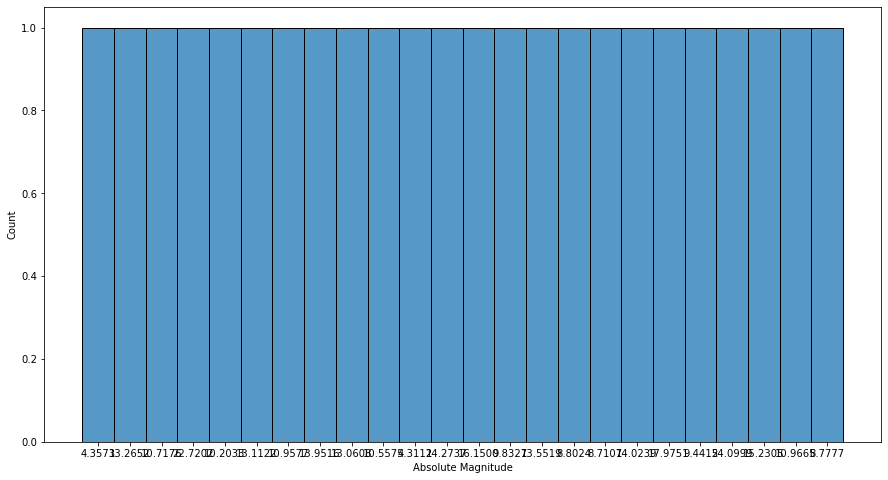

In [775]:
#Distributions of Absolute magnetude 
plt.figure(figsize=(15,8))
sns.histplot(Df_stars['Absolute Magnitude:'], bins = 30)
plt.xlabel('Absolute Magnitude')
#sns.savefig("Dist_Solar_Mass.png")
plt.savefig('Dist_Absolute Magnitude.png')

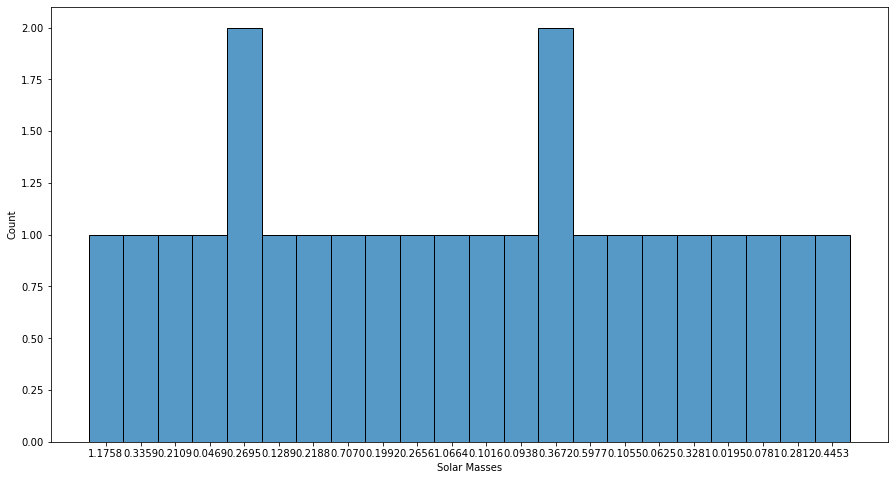

In [770]:
#Distributions of solar mass
plt.figure(figsize=(15,8))
sns.histplot(Df_stars['Solar Masses:'], bins = 10)
plt.xlabel('Solar Masses')
#sns.savefig("Dist_Solar_Mass.png")
plt.savefig('Dist_Solar_Mass.png')

<AxesSubplot:xlabel='Surface Temperature:', ylabel='Solar Masses:'>

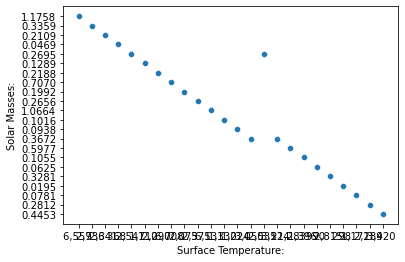

In [712]:
#Df_stars['Distance to Sol:'].str.replace(r'ly', '')
Df_stars = Df_stars.replace({'ly':''}, regex=True)
Df_stars = Df_stars.replace({'K':''}, regex=True)
#Relation between solar mass and surface temperature
sns.scatterplot(data = Df_stars, x = 'Surface Temperature:', y = 'Solar Masses:')#, hue = 'Drivetrain', size = 'Cylinders' )

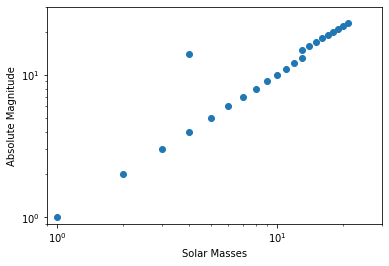

In [778]:
fig = plt.figure()
ax = plt.gca()
plt.scatter(data = Df_stars, y='Absolute Magnitude:', x='Solar Masses:')
plt.ylabel('Absolute Magnitude')
plt.xlabel('Solar Masses')
plt.xlim([0.9, 30])
plt.ylim([0.9, 30])
ax.set_yscale('log')
ax.set_xscale('log')
plt.savefig("Magnetude_vs_Mass.png")

In [703]:
Df_stars['Surface Temperature:']

1       6,557 
6       2,936 
35      2,341 
40        368 
57      2,541 
62      1,710 
64      2,290 
66      6,708 
72      2,075 
80      2,375 
89      6,131 
104     1,332 
138     1,024 
152     3,050 
176     2,535 
178     3,124 
188    21,283 
195     1,396 
221       990 
233     2,815 
242       298 
250     1,172 
258     2,189 
267     3,420 
Name: Surface Temperature:, dtype: object

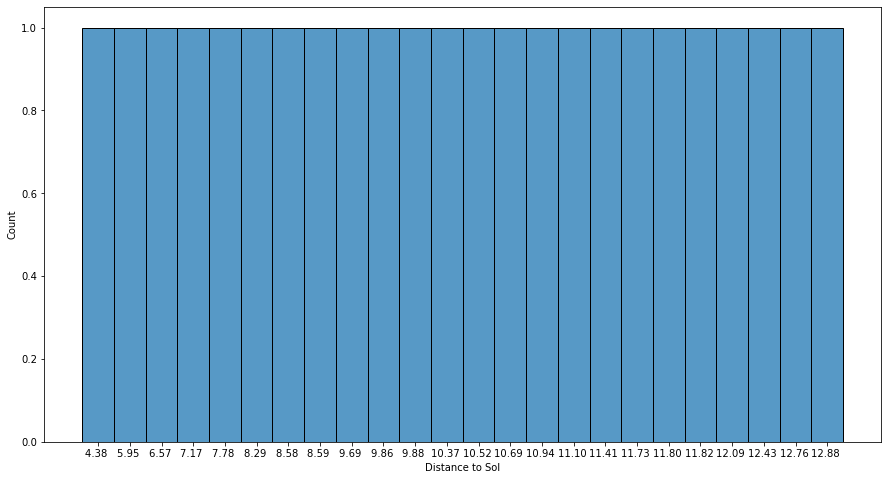

In [771]:
#Distribution of distance
plt.figure(figsize=(15,8))
sns.histplot(Df_stars['Distance to Sol:'], bins = 10)
plt.xlabel('Distance to Sol')
#sns.savefig("Dist_Solar_Mass.png")
plt.savefig('Dist_Distance to Sol.png')

In [728]:
#sns.scatterplot(data = df, x = 'Combined MPG', y = 'Fuel Cost/Year', hue = 'Drivetrain', size = 'Cylinders' )

sns.scatterplot(data = Df_stars, x='Surface Temperature:', y='Absolute Magnitude:')

AttributeError: module 'matplotlib' has no attribute 'scatter'

TypeError: can only concatenate str (not "float") to str

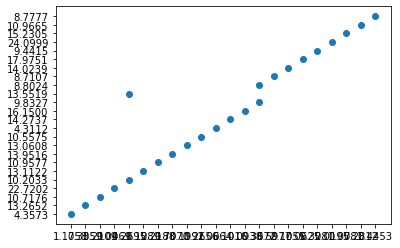

In [754]:
#f, ax = plt.subplots(figsize=(7, 7))
#ax.set(xscale="log", yscale="log")
#sns.regplot(data = Df_stars, x='Solar Masses:', y='Absolute Magnitude:', ax=ax, scatter_kws={"s": 100})
fig = plt.figure()
ax = plt.gca()
plt.scatter(data = Df_stars, x='Solar Masses:', y='Absolute Magnitude:')
# Fit with polyfit
x = Df_stars['Solar Masses:']
y = Df_stars['Absolute Magnitude:']
b, m = polyfit(x,y, 1)
plt.plot(x, b + m * x, '-')

plt.xlabel('Masse')
plt.ylabel('Absolute Magnitude')
plt.xlim([0.1, 30])
plt.ylim([0.1, 30])
ax.set_yscale('log')
ax.set_xscale('log')
plt.savefig("output.png")
#ax.set(xscale="log", yscale="log")
#sns.regplot("x", "y", data, ax=ax, scatter_kws={"s": 100})


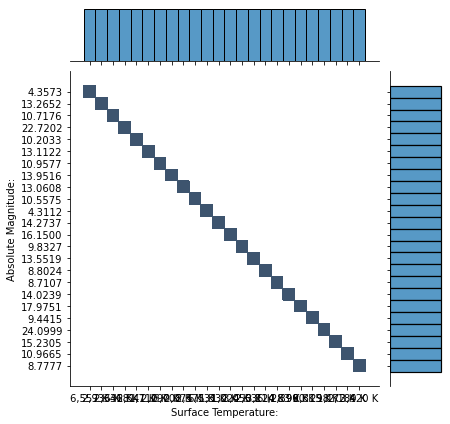

In [685]:
sns.jointplot(data = Df_stars, x='Surface Temperature:', y='Absolute Magnitude:', kind = 'hist')

<AxesSubplot:xlabel='Distance to Sol:', ylabel='Count'>

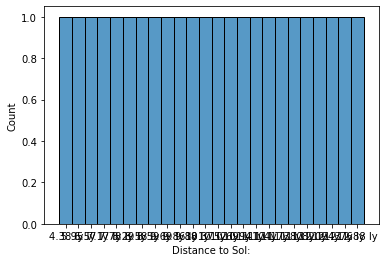

In [687]:
#Distribution distance to the sun
sns.histplot(Df_stars['Distance to Sol:'], bins = 20)

In [1]:
# #Df_stars._get_numeric_data().columns
# sns.pairplot(Df_stars[['Distance to Sol:','Surface Temperature:','Solar Masses:','Solar Radius:','Absolute Magnitude:']])